### Name: Sumeet Shah
### Date: 03/23/2023
### Project 1
### Title: Predicting Heart disease

### Business Problem: 

According to the World Health Organization, cardiovascular disease (CVD) is the top cause of death worldwide. In 2015, over 30% of global deaths were due to CVD, leading to over 17 million deaths. In the United States alone, 25% of deaths were attributed to heart disease, killing over 630,000 Americans annually. Recent studies have shown that the application of machine learning techniques may have the potential to improve heart failure outcomes and management, including cost savings by improving existing diagnostic and treatment support systems. The goal of this project is to use statistical learning to identify the combination of the factors that are more likely to be associated with heart failure and predict whether a patient will get heart attack based on the given attributes. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high-risk patients and in turn reduce the complications.

### Dataset

https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression

The dataset is publicly available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import yellowbrick
from yellowbrick.classifier import ROCAUC

### Loading Data

In [3]:
df = pd.read_csv('C:/Users/14807/DSC680/Project1/framingham.csv')

### Table dimension

In [4]:
print("The dimension of the table is: ", df.shape)

The dimension of the table is:  (4238, 16)


### Look at the dataset

In [5]:
print(df.head(3))

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   

   TenYearCHD  
0           0  
1           0  
2           0  


### List of columns

In [6]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [8]:
df.nunique()

male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1363
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

### Data description

In [9]:
print("Describe Data")
print(df.describe())

Describe Data
              male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.158316  

### Exploratory data analysis:

0    3594
1     644
Name: TenYearCHD, dtype: int64
Risk of developing CHD in 10 years


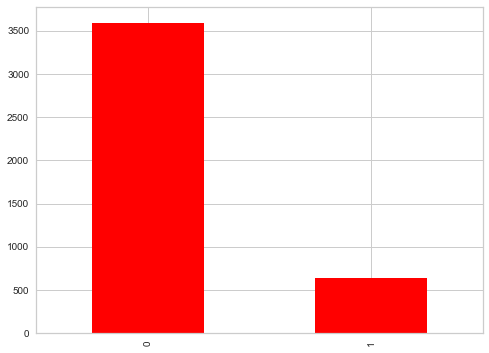

In [10]:
print(df["TenYearCHD"].value_counts())
df["TenYearCHD"].value_counts().plot(kind="bar", figsize=(8,6), color='red');
print("Risk of developing CHD in 10 years")

### Histograms

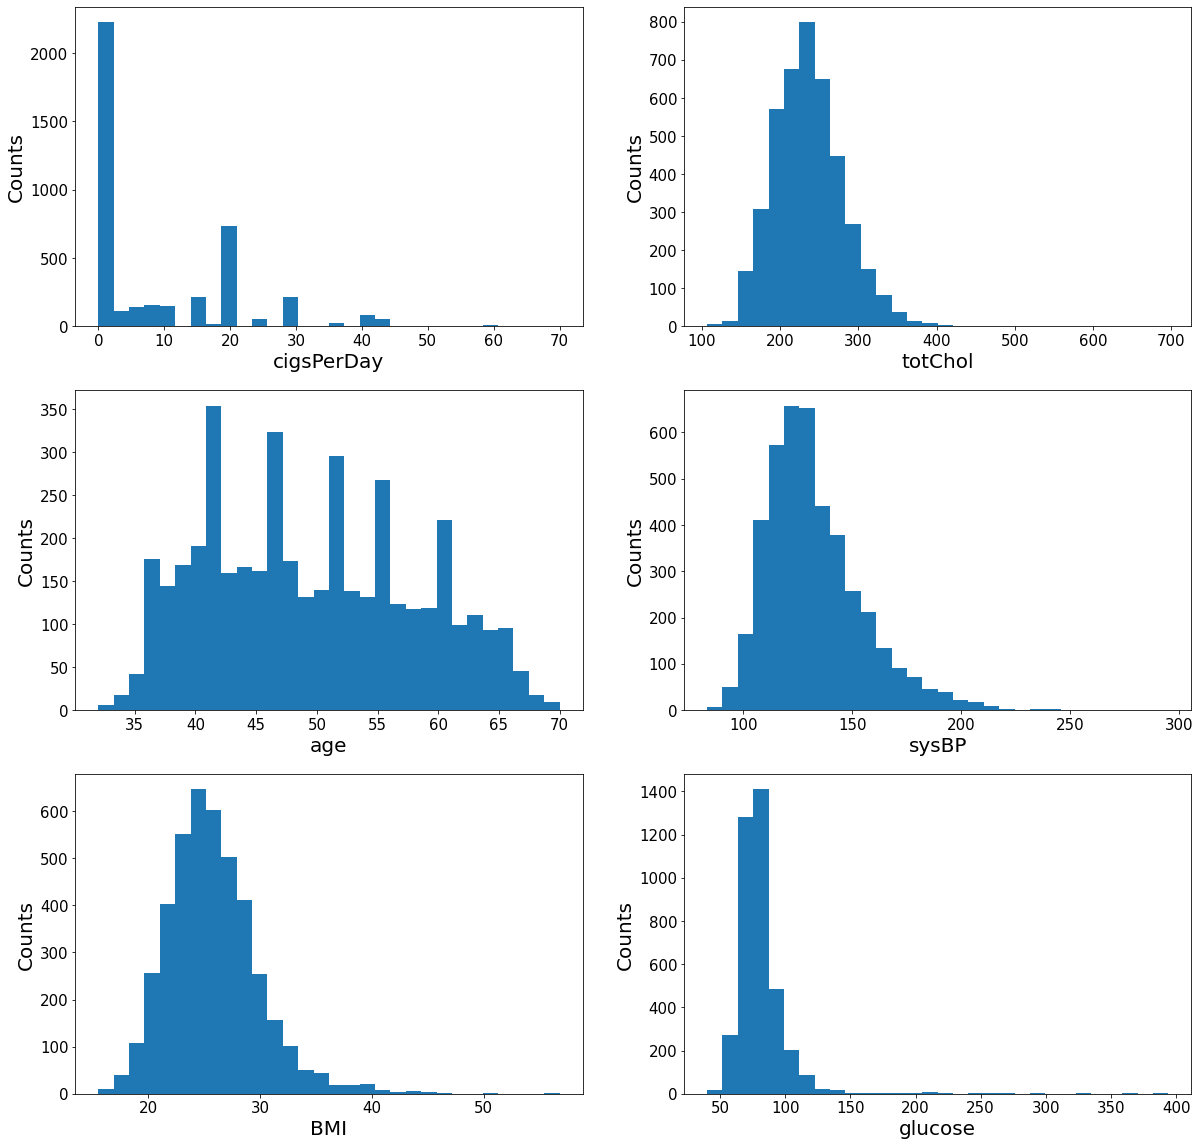

In [32]:
plt.rcParams['figure.figsize'] = (20, 20)
fig, axes = plt.subplots(nrows = 3, ncols = 2)
axes = axes.ravel()
num_features = ['cigsPerDay', 'totChol', 'age','sysBP','BMI', 'glucose']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts', 'Counts','Counts']
for idx, ax in enumerate(axes):
 ax.hist(df[num_features[idx]].dropna(), bins=30)
 ax.set_xlabel(xaxes[idx], fontsize=20)
 ax.set_ylabel(yaxes[idx], fontsize=20)
 ax.tick_params(axis='both', labelsize=15)
plt.show()

### Barcharts

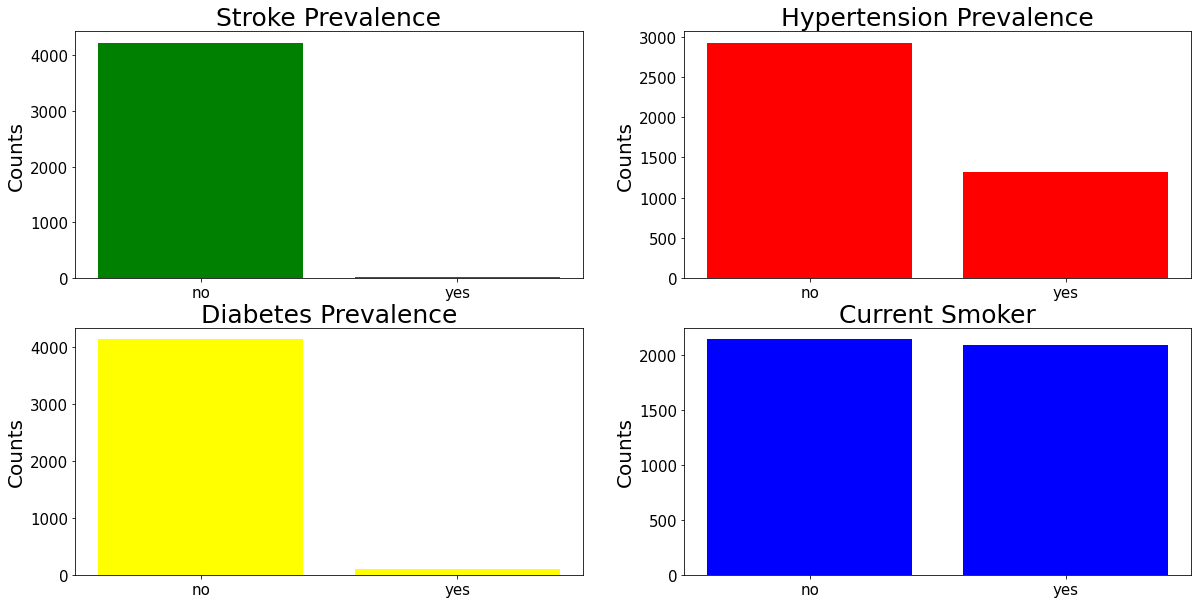

In [43]:
plt.rcParams['figure.figsize'] = (20, 10)
fig, axes = plt.subplots(nrows = 2, ncols = 2)

X_prevalentStroke = df.replace({'prevalentStroke': {1: 'yes', 0: 'no'}}).groupby('prevalentStroke').size().reset_index(name='Counts')['prevalentStroke']
Y_prevalentStroke = df.replace({'prevalentStroke': {1: 'yes', 0: 'no'}}).groupby('prevalentStroke').size().reset_index(name='Counts')['Counts']
axes[0, 0].bar(X_prevalentStroke, Y_prevalentStroke, color = 'Green')
axes[0, 0].set_title('Stroke Prevalence', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)


X_prevalentHyp = df.replace({'prevalentHyp': {1: 'yes', 0: 'no'}}).groupby('prevalentHyp').size().reset_index(name='Counts')['prevalentHyp']
Y_prevalentHyp = df.replace({'prevalentHyp': {1: 'yes', 0: 'no'}}).groupby('prevalentHyp').size().reset_index(name='Counts')['Counts']
axes[0, 1].bar(X_prevalentHyp, Y_prevalentHyp, color = 'Red')
axes[0, 1].set_title('Hypertension Prevalence', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)


X_diabetes = df.replace({'diabetes': {1: 'yes', 0: 'no'}}).groupby('diabetes').size().reset_index(name='Counts')['diabetes']
Y_diabetes = df.replace({'diabetes': {1: 'yes', 0: 'no'}}).groupby('diabetes').size().reset_index(name='Counts')['Counts']
axes[1, 0].bar(X_diabetes, Y_diabetes, color = 'Yellow')
axes[1, 0].set_title('Diabetes Prevalence', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)


X_diabetes = df.replace({'currentSmoker': {1: 'yes', 0: 'no'}}).groupby('currentSmoker').size().reset_index(name='Counts')['currentSmoker']
Y_diabetes = df.replace({'currentSmoker': {1: 'yes', 0: 'no'}}).groupby('currentSmoker').size().reset_index(name='Counts')['Counts']
axes[1, 1].bar(X_diabetes, Y_diabetes, color = 'Blue')
axes[1, 1].set_title('Current Smoker', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)


### Stack plots

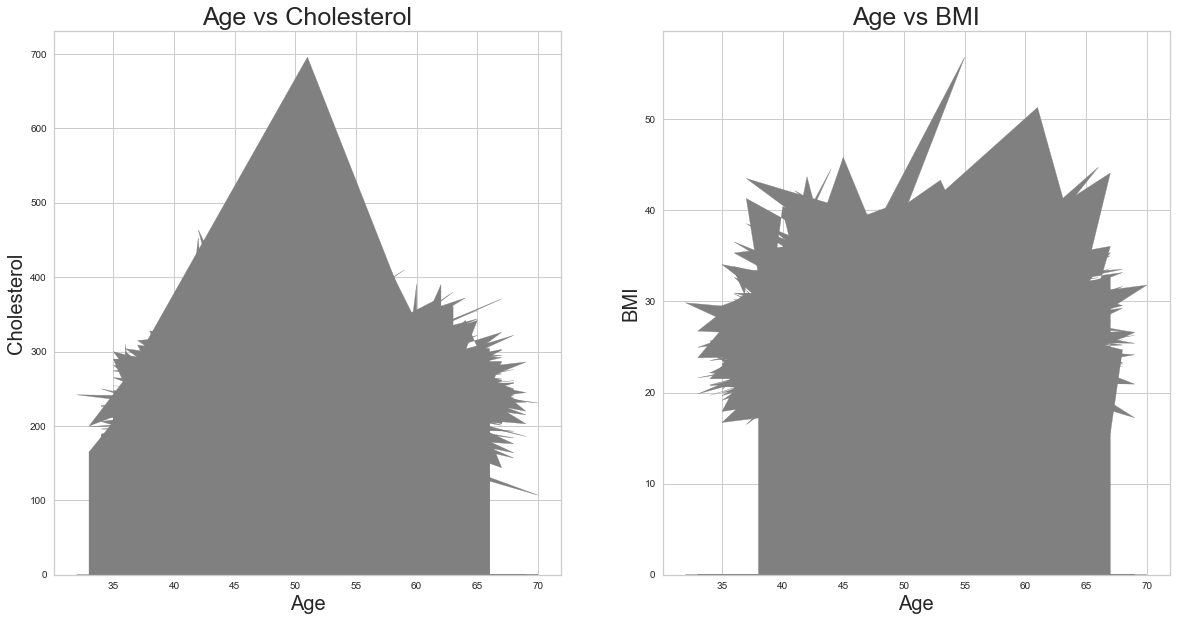

In [27]:
plt.rcParams['figure.figsize'] = (20, 10)
fig, axes = plt.subplots(nrows = 1, ncols = 2)

age = df['age']
totChol = df['totChol']
axes[0].stackplot(age, totChol, color = 'grey')
axes[0].set_title('Age vs Cholesterol', fontsize=25)
axes[0].set_ylabel('Cholesterol', fontsize=20)
axes[0].set_xlabel('Age', fontsize=20)
axes[0].grid(True)

age = df['age']
BMI = df['BMI']
axes[1].stackplot(age, BMI, color = 'grey')
axes[1].set_title('Age vs BMI', fontsize=25)
axes[1].set_ylabel('BMI', fontsize=20)
axes[1].set_xlabel('Age', fontsize=20)
axes[1].grid(True)



In [28]:
### Scatter plots

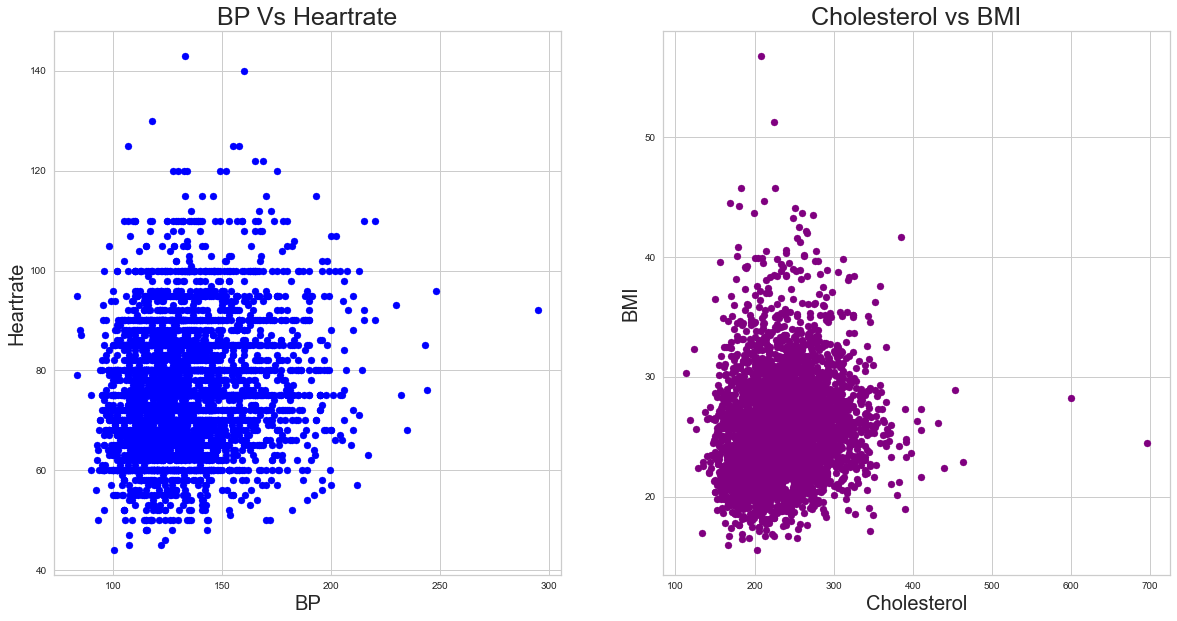

In [29]:
plt.rcParams['figure.figsize'] = (20, 10)
fig, axes = plt.subplots(nrows = 1, ncols = 2)

sysBP = df['sysBP']
heartRate = df['heartRate']
axes[0].scatter(sysBP, heartRate, color = 'Blue')
axes[0].set_title('BP Vs Heartrate', fontsize=25)
axes[0].set_ylabel('Heartrate', fontsize=20)
axes[0].set_xlabel('BP', fontsize=20)
axes[0].grid(True)

totChol = df['totChol']
BMI = df['BMI']
axes[1].scatter(totChol, BMI, color = 'Purple')
axes[1].set_title('Cholesterol vs BMI', fontsize=25)
axes[1].set_ylabel('BMI', fontsize=20)
axes[1].set_xlabel('Cholesterol', fontsize=20)
axes[1].grid(True)

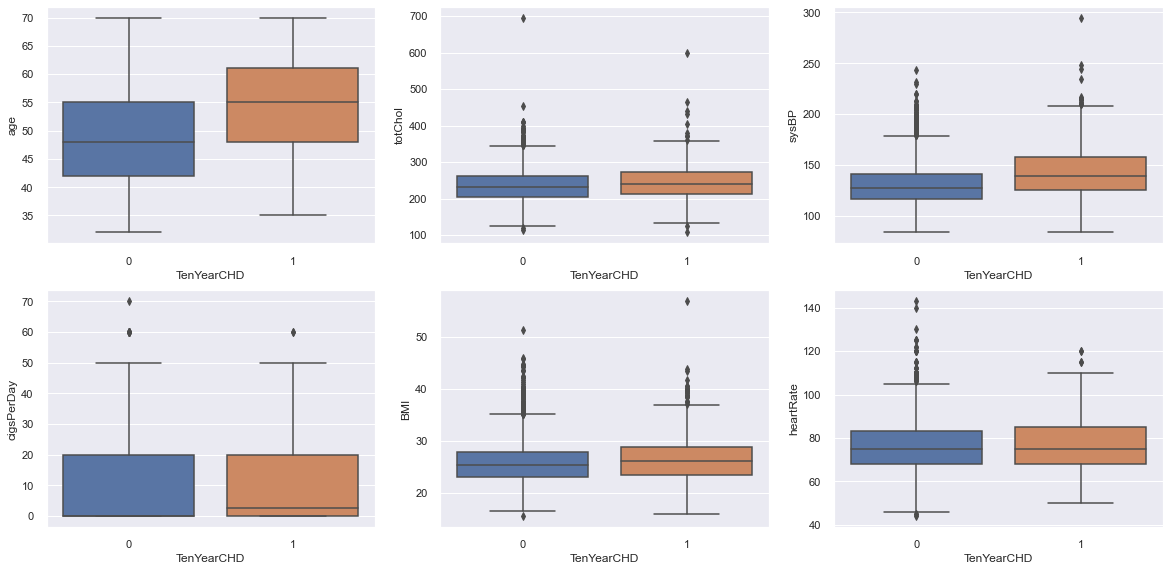

In [39]:
import seaborn as sns
sns.set(style='darkgrid')
num_features = ['age', 'totChol','sysBP','cigsPerDay', 'BMI', 'heartRate']
index = 0
plt.figure(figsize=(20,20))
for feature in num_features:
    if feature != "TenYearCHD":
        index += 1
        plt.subplot(4, 3, index)
        sns.boxplot(x='TenYearCHD', y=feature, data=df)

### Handling missing values

In [40]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [41]:
df1 = df.copy()

In [42]:
df1 = df1.apply(lambda df1: df1.fillna(df1.mean()),axis=0)
df1.isnull().sum(axis = 0)

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### Correlation heat map

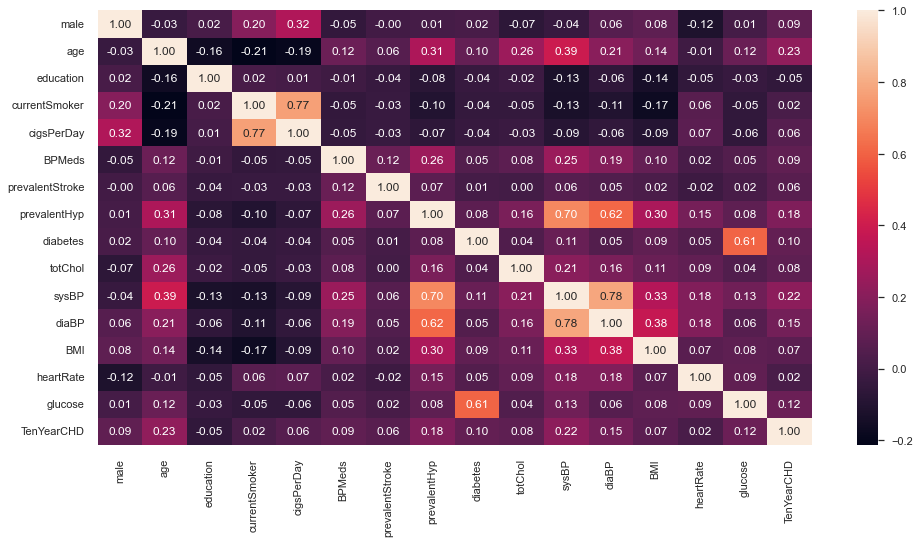

In [56]:
plt.figure(figsize= (16, 8))
sns.heatmap(df1.corr(), annot = True, fmt= '.2f');

### Removing education as it has no correlation

In [57]:
df2 = df1.drop(['education'], axis = 1)
df2

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.00000,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,0,0.0,0.00000,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1,20.0,0.00000,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,1,30.0,0.00000,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,1,23.0,0.00000,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.00000,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000,1
4234,1,51,1,43.0,0.00000,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000,0
4235,0,48,1,20.0,0.02963,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1,15.0,0.00000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753,0


### Training and test data set

In [58]:
x = df2.drop('TenYearCHD', axis = 1)
y = df2['TenYearCHD']
x

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.00000,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000
1,0,46,0,0.0,0.00000,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000
2,1,48,1,20.0,0.00000,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000
3,0,61,1,30.0,0.00000,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000
4,0,46,1,23.0,0.00000,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.00000,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000
4234,1,51,1,43.0,0.00000,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000
4235,0,48,1,20.0,0.02963,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000
4236,0,44,1,15.0,0.00000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753


In [59]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [60]:
X_train.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
848,0,61,0,0.000000,0.0,0,0,0,255.0,114.0,70.5,24.79,83.0,107.0
833,0,53,0,0.000000,0.0,0,1,1,248.0,200.0,140.0,43.30,107.0,130.0
3021,1,53,1,9.003089,0.0,0,0,0,276.0,130.0,86.0,24.21,58.0,82.0
1252,1,38,0,0.000000,0.0,0,1,0,252.0,125.0,92.0,24.72,60.0,69.0
3281,1,45,1,20.000000,0.0,0,0,0,229.0,117.0,78.0,22.79,85.0,86.0


In [61]:
y_train.head()

848     0
833     1
3021    0
1252    0
3281    0
Name: TenYearCHD, dtype: int64

In [62]:
y.value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

### Logistic Regression Model

In [63]:
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
train_pred = lr.predict(X_train)

C:\Users\14807\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1078    9]
 [ 181    4]]


0.85062893081761

### Confusion Matrix

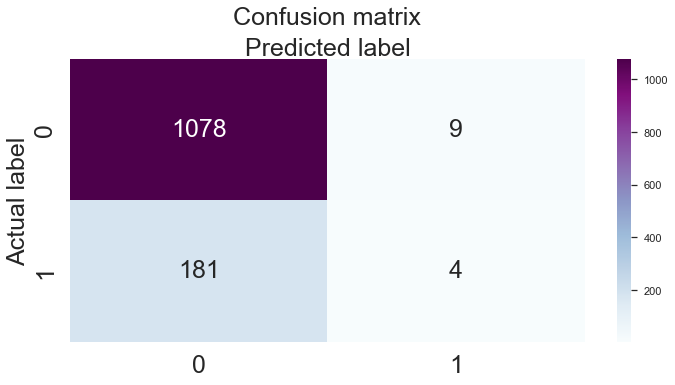

In [79]:
class_names=['No Heart disease','Heart disease'] # name  of classes
fig, ax = plt.subplots(figsize=(10, 5))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sn.heatmap(pd.DataFrame(cm), annot=True, cmap='BuPu', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1, fontsize=25)
plt.ylabel('Actual label', fontsize=25)
plt.xlabel('Predicted label', fontsize=25)
plt.rcParams["font.size"] = "25"
plt.tick_params(labelsize=25)
#plt.rcParams["figure.figsize"] = (7,5)

A confusion matrix is a technique for summarizing the performance of a classification algorithm. Classification accuracy alone can be misleading if we  have an unequal number of observations in each class or if we have more than two classes in our dataset. Calculating a confusion matrix gives us a better idea of what our classification model is getting right and what types of errors it is making.

In [80]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1087
           1       0.31      0.02      0.04       185

    accuracy                           0.85      1272
   macro avg       0.58      0.51      0.48      1272
weighted avg       0.78      0.85      0.79      1272



I have used ROC curve for evaluation. AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.

C:\Users\14807\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


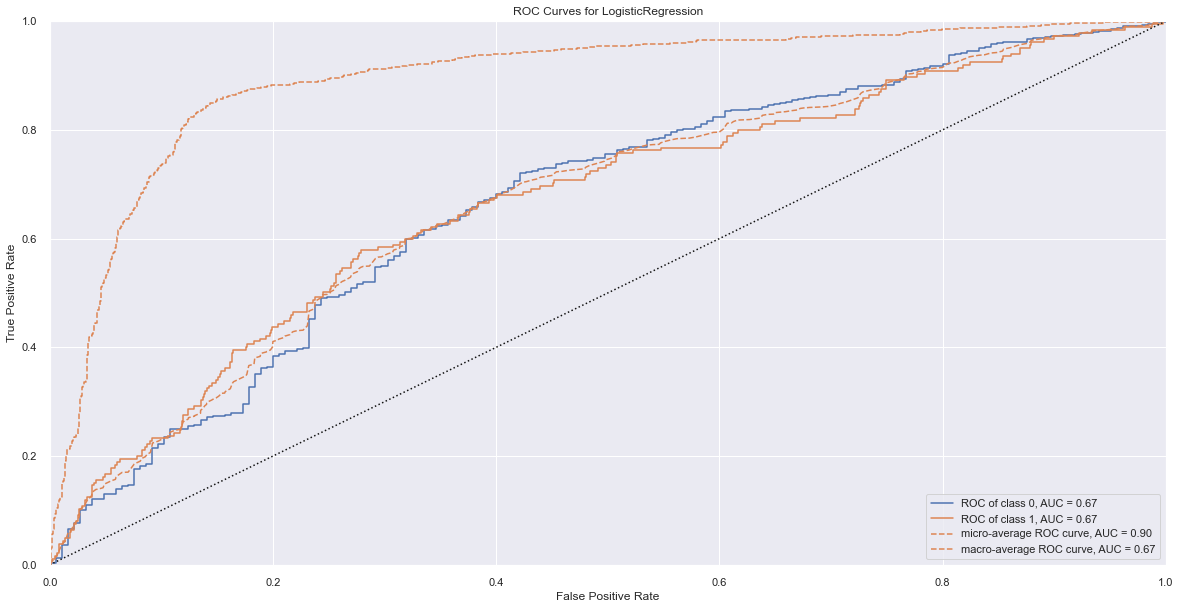

In [81]:
visualizer = ROCAUC(lr)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

### KNN Model

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() # build the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [83]:
y_pred = knn.predict(X_test)

C:\Users\14807\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [84]:
print('Train Score is : ' , knn.score(X_train, y_train))
print('Test Score is : ' , knn.score(X_test, y_test))

C:\Users\14807\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\14807\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Train Score is :  0.8691840863115307
Test Score is :  0.8301886792452831


In [85]:
from sklearn.metrics import classification_report

print('Classification Report is: \n \n' , classification_report(y_test, y_pred ))

Classification Report is: 
 
               precision    recall  f1-score   support

           0       0.86      0.95      0.91      1087
           1       0.27      0.10      0.14       185

    accuracy                           0.83      1272
   macro avg       0.57      0.53      0.52      1272
weighted avg       0.78      0.83      0.79      1272



The accuracy score is: 0.8301886792452831

 Confusion matrix 
 
 [[1038   49]
 [ 167   18]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      1087
           1       0.27      0.10      0.14       185

    accuracy                           0.83      1272
   macro avg       0.57      0.53      0.52      1272
weighted avg       0.78      0.83      0.79      1272



C:\Users\14807\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\14807\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


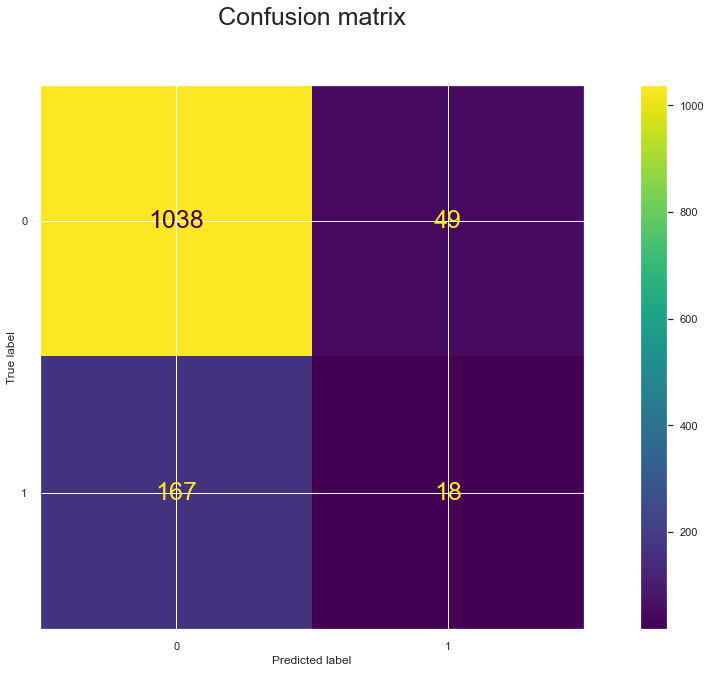

In [86]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

print('The accuracy score is:', accuracy_score(y_test, y_pred)) 
cm = confusion_matrix(y_test, y_pred)
print('\n Confusion matrix \n \n', cm)
print(classification_report(y_test, y_pred ))

plot_confusion_matrix(knn, X_test, y_test) # 
plt.title('Confusion matrix', y=1.1, fontsize=25)
plt.show()